# KNN Python
Implementation of KNN (K Nearest Neighbors) on Big Mart sales dataset 



## Reading train data and quick check

In [2]:
import pandas as pd
df = pd.read_csv('Train_UWu5bXk.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Impute missing values with mean for a numerical value and mode categorical value


In [3]:
df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

## Changing categorical variables to numerical and drop the id columns


In [4]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
#conversion of categorical values to dummies/indicator variables
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Split data to test and train set 30% for train dataset


In [5]:
#load library for data splitting
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [6]:
x_train.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4214,10.6,0.056884,231.9642,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1527,8.6,0.069809,90.5146,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6768,17.2,0.012031,166.6184,1999,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [8]:
y_train.head(3)

4214    3020.7346
1527     729.7168
6768    1155.8288
Name: Item_Outlet_Sales, dtype: float64

## Preprocessing - Scaling the features


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [12]:
#check data after scaling
x_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.358592,0.174609,0.851764,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.239260,0.214282,0.251379,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.752387,0.036929,0.574403,0.583333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Choosing k - value - values from 1 to 20

In [13]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate MEAN SQUARED ERROR  (RMSE)
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1592.3552391138487
RMSE value for k=  2 is: 1348.6584985520142
RMSE value for k=  3 is: 1287.1474967573286
RMSE value for k=  4 is: 1260.9352384856293
RMSE value for k=  5 is: 1243.7028554614315
RMSE value for k=  6 is: 1237.2586409607418
RMSE value for k=  7 is: 1232.7818049997534
RMSE value for k=  8 is: 1234.3769976694161
RMSE value for k=  9 is: 1235.2667381597835
RMSE value for k=  10 is: 1237.9985338510664
RMSE value for k=  11 is: 1234.8973535663677
RMSE value for k=  12 is: 1235.3859431274836
RMSE value for k=  13 is: 1237.8730807153604
RMSE value for k=  14 is: 1243.466806724461
RMSE value for k=  15 is: 1250.4119224053077
RMSE value for k=  16 is: 1257.9678568895963
RMSE value for k=  17 is: 1262.4195590585655
RMSE value for k=  18 is: 1275.4667036621486
RMSE value for k=  19 is: 1284.2720489862636
RMSE value for k=  20 is: 1290.2990981837572


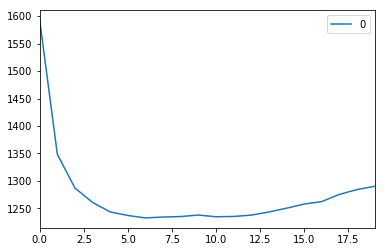

In [15]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 8, the RMSE is approximately 1234.38, and shoots up on further increasing the k value. We can safely say that k=8 will give us the best result in this case.

These are the predictions using our training dataset. Let us now predict the values for test dataset and make a submission.

<br>
## Predictions on the test dataset with k=8

In [19]:
#reading test and submission files
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)  #fill missing values
test = pd.get_dummies(test) #put dummies instead of categorical values
test_scaled = scaler.fit_transform(test) #scale data
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file

model = neighbors.KNeighborsRegressor(n_neighbors = 8)
model.fit(x_train, y_train)  #fit the model
   # pred=model.predict(x_test) #make prediction on test set 
    
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file_8.csv',index=False)

## Alternative way to calculate k value is to implement GridsearchCV <br>
For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [20]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 8}